# **Final Project Notebook**

## **Initalise**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## **Load Data**

In [2]:
df = pd.read_csv('PPD2codebook_April_1_2022_csv.csv')

/var/folders/my/jvcytwq53hddwxkgl74_jfz40000gn/T/ipykernel_96854/3187486359.py:1: DtypeWarning: Columns (10,18,20,22,24,26,27,28,34,35,36,37,38,39,40,41,44,45,47,50,51,52,53,54,57,59,60,61,66,67,68,69,70,71,75,76,81,84,87,90,92,94,97,98,107,108,109,110,111,112,113,114,118,119,120,121,122,123,124,125,126,127,128,129,130,132,143,144,145,146,148,149,151,152,155,158,159,160,161,162,163,164,165,166,167,168,170,171,172,173,174,175,176,177,178,179,180,181,182,185,186,189,192,193,194,195,197,198,202,203,204,205,207,210,211,212,213,214,215,216,217,218,219,220,221,222,223,232,233,235,236,237,238,239,240,241,242,248,434,441,443,445,446,447,448,449,450,452,454,472,474,480,488) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('PPD2codebook_April_1_2022_csv.csv')


## **Data Wrangling**

#### **Check for null values**

In [3]:
df.isnull().sum()

project_id                              4
donor                                   4
six_overall_rating                    512
countryname_COW                       565
countryname_WB                          2
country_code_WB                       779
evaluation_date                       246
project_duration                      580
eval_lag                              605
completion_date                       534
aid_type                            17820
projectname                          1402
wb_sector_board                      2501
original_overall_rating               514
external_evaluator                   3654
office_presence                      5786
sector_code                           278
sector_description                    277
purpose_code                         8158
purpose_description                  8157
aiddata_disbursement_amount         21104
aiddata_id                          20707
aiddata_longdescription             14334
aiddata_purposecode               

#### **Isolate useful columns**

In [4]:
columns_to_keep = [
    'project_id',
    'donor',
    'six_overall_rating',
    'countryname_COW',
    'countryname_WB',
    'country_code_WB',
    'evaluation_date',
    'project_duration',
    'eval_lag',
    'completion_date',
    'completion_year',
    'projectname',
    'external_evaluator',
    'office_presence',
    'sector_code',
    'sector_description',
    'evalyear',
    'start_date',
    'startyear',
    'region',
    'completion_year',
    'projectsize_original'
]                   

df = df[columns_to_keep]

In [5]:
df.head()

,project_id,donor,six_overall_rating,countryname_COW,countryname_WB,country_code_WB,evaluation_date,project_duration,eval_lag,completion_date,completion_year,projectname,external_evaluator,office_presence,sector_code,sector_description,evalyear,start_date,startyear,region,completion_year,projectsize_original
0,1.0,AfricanDB,4.590909,Multinational,Multi-country,NaN,8/26/06,1311.0,603.0,12/31/04,2004.0,Comesa - Public Procurement Reform Project,internal,NaN,430.0,Other Multisector,2006.0,5/30/01,2001.0,NaN,2004.0,1165661.3
1,2.0,AfricanDB,4.076923,Multinational,Multi-country,NaN,5/18/09,2023.0,1144.0,3/31/06,2006.0,Lake Chad Basin Commission (LCBC): Pilot Resea...,internal,NaN,310.0,"Agriculture, Forestry, Fishing",2009.0,9/15/00,2000.0,NaN,2006.0,1553269.8
2,3.0,AfricanDB,4.235294,Multinational,Multi-country,NaN,2/26/07,786.0,87.0,12/1/06,2006.0,Projet d’appui aux centres regionaux d’assista...,internal,NaN,430.0,Other Multisector,2007.0,10/6/04,2004.0,NaN,2006.0,1984632.8
3,4.0,AfricanDB,3.961538,Multinational,Multi-country,NaN,6/19/09,2165.0,1085.0,6/30/06,2006.0,Projet de Renforcement Institutionnel de l’ins...,internal,NaN,160.0,Other Social Infrastructure & Services,2009.0,7/26/00,2000.0,NaN,2006.0,598754.5
4,5.0,AfricanDB,4.342105,Multinational,Multi-country,NaN,5/21/07,2574.0,140.0,1/1/07,2007.0,The Sixth Line of Credit to the East African D...,internal,NaN,240.0,Banking & Financial Services,2007.0,12/15/99,1999.0,NaN,2007.0,17422942.0


In [6]:
df.isnull().sum()

project_id                 4
donor                      4
six_overall_rating       512
countryname_COW          565
countryname_WB             2
country_code_WB          779
evaluation_date          246
project_duration         580
eval_lag                 605
completion_date          534
completion_year          538
projectname             1402
external_evaluator      3654
office_presence         5786
sector_code              278
sector_description       277
evalyear                  82
start_date               110
startyear                110
region                   834
completion_year          538
projectsize_original    5340
dtype: int64

#### **Check data types**

In [7]:
df.dtypes

project_id              float64
donor                    object
six_overall_rating      float64
countryname_COW          object
countryname_WB           object
country_code_WB          object
evaluation_date          object
project_duration        float64
eval_lag                float64
completion_date          object
completion_year         float64
projectname              object
external_evaluator       object
office_presence         float64
sector_code             float64
sector_description       object
evalyear                float64
start_date               object
startyear               float64
region                   object
completion_year         float64
projectsize_original    float64
dtype: object

#### **Clean data types**

In [8]:
df.columns

Index(['project_id', 'donor', 'six_overall_rating', 'countryname_COW',
       'countryname_WB', 'country_code_WB', 'evaluation_date',
       'project_duration', 'eval_lag', 'completion_date', 'completion_year',
       'projectname', 'external_evaluator', 'office_presence', 'sector_code',
       'sector_description', 'evalyear', 'start_date', 'startyear', 'region',
       'completion_year', 'projectsize_original'],
      dtype='object')

#### **Dealing with null values**

In [9]:
df['project_id'] = df['project_id'].ffill()
df['completion_year'] = df['completion_year'].ffill()

In [10]:
# Drop rows where 'six_overall_rating' and 'donor' are null
df = df.dropna(subset=['six_overall_rating', 'donor'])

In [11]:
df['country_code_WB'].value_counts()

country_code_WB
IDN    878
IND    826
CHN    742
PAK    615
BGD    533
PHL    453
BRA    442
VNM    305
KEN    305
LKA    304
GHA    304
THA    296
TUN    296
NPL    287
UGA    274
MWI    274
MAR    268
TZA    267
MEX    252
NGA    238
EGY    231
ETH    229
ZMB    229
TUR    229
COL    223
MOZ    214
SEN    211
AFG    202
YEM    194
MLI    190
RWA    188
PER    185
BFA    182
SDN    180
ZAR    178
BOL    175
LAO    175
MDG    174
KHM    169
ARG    166
MYS    159
CMR    154
PNG    153
BEN    146
NER    144
SLE    142
CIV    141
BDI    134
JOR    133
RUS    132
ZWE    127
ROM    127
HND    125
GIN    124
ZAF    120
KOR    120
ECU    116
ALB    115
KGZ    114
NIC    114
MNG    114
LSO    114
MRT    113
GEO    106
JAM    105
TCD    101
BIH    100
TGO     99
ARM     98
MDA     91
CHL     91
GMB     90
IRQ     89
LBR     86
GTM     85
TJK     85
HTI     83
MMR     83
UKR     81
UZB     79
DOM     79
SLV     77
KAZ     76
URY     76
SOM     74
YUG     74
DZA     74
TMP     73
MKD     72
SLB  

In [12]:
df.isnull().sum()

project_id                 0
donor                      0
six_overall_rating         0
countryname_COW          552
countryname_WB             0
country_code_WB          741
evaluation_date          169
project_duration         518
eval_lag                 481
completion_date          473
completion_year            0
projectname             1288
external_evaluator      3332
office_presence         5566
sector_code              264
sector_description       264
evalyear                  14
start_date                86
startyear                 86
region                   795
completion_year            0
projectsize_original    5266
dtype: int64

In [13]:
# Fill null values in 'country_code_WB' with 'PSE' where 'countryname_WB' is 'West Bank and Gaza'
df.loc[df['countryname_WB'] == 'West Bank and Gaza', 'country_code_WB'] = df.loc[df['countryname_WB'] == 'West Bank and Gaza', 'country_code_WB'].fillna('PSE')
# Fill null values in 'country_code_WB' with 'SWZ' where 'countryname_WB' is 'Eswatini'
df.loc[df['countryname_WB'] == 'Eswatini', 'country_code_WB'] = df.loc[df['countryname_WB'] == 'Eswatini', 'country_code_WB'].fillna('SWZ')

In [14]:
df = df.dropna(subset=['country_code_WB'])

In [15]:
df.drop(columns=['countryname_COW', 'countryname_WB'], inplace=True)

In [16]:
df = df.dropna(subset=['project_duration'])

In [17]:
df = df.dropna(subset=['eval_lag', 'evalyear'])

In [18]:
columns_to_convert = ['project_id', 'project_duration', 'eval_lag', 'evalyear', 'startyear', 'completion_year']
df[columns_to_convert] = df[columns_to_convert].astype(int)

In [19]:
df.isnull().sum()

project_id                 0
donor                      0
six_overall_rating         0
country_code_WB            0
evaluation_date          126
project_duration           0
eval_lag                   0
completion_date            0
completion_year            0
projectname             1239
external_evaluator      2918
office_presence         4709
sector_code              210
sector_description       210
evalyear                   0
start_date                 0
startyear                  0
region                   117
completion_year            0
projectsize_original    4933
dtype: int64

In [20]:
df.head()

,project_id,donor,six_overall_rating,country_code_WB,evaluation_date,project_duration,eval_lag,completion_date,completion_year,projectname,external_evaluator,office_presence,sector_code,sector_description,evalyear,start_date,startyear,region,completion_year,projectsize_original
62,61,AfricanDB,4.060976,AGO,9/27/11,3144,28,8/30/11,2011,Artisanal Fisheries Development Project,internal,NaN,310.0,"Agriculture, Forestry, Fishing",2011,1/20/03,2003,Sub-Saharan Africa,2011,6488027.5
63,62,AfricanDB,4.410000,AGO,NaN,3189,1,9/30/16,2016,"Sumbe Water Supply , Sanitation and Institutio...",internal,NaN,NaN,NaN,2017,1/7/08,2008,Sub-Saharan Africa,2016,24000000.0
64,63,AfricanDB,4.500000,AGO,NaN,703,1,6/30/16,2016,Power Sector Reform Support Program,internal,NaN,NaN,NaN,2017,7/28/14,2014,Sub-Saharan Africa,2016,718705728.0
65,64,AfricanDB,4.950000,AGO,NaN,1917,0,6/30/16,2016,The Institutional Capacity Building For Povert...,internal,NaN,NaN,NaN,2016,4/1/11,2011,Sub-Saharan Africa,2016,5170000.0
66,65,AfricanDB,4.333333,BEN,9/30/06,3202,457,6/30/05,2005,Projet de reamenagement de la route Cotonou - ...,internal,NaN,210.0,Transport & Storage,2006,9/23/96,1996,Sub-Saharan Africa,2005,15112584.0


In [21]:
df.shape

(19498, 20)

In [22]:
df['office_presence'] = df['office_presence'].fillna(0)

In [23]:
df['external_evaluator'] = df['external_evaluator'].fillna('Unknown')

In [24]:
# Drop rows with null values in 'sector_code' or 'sector_description
df = df.dropna(subset=['sector_code', 'sector_description'])

In [25]:
df.isnull().sum()

project_id                 0
donor                      0
six_overall_rating         0
country_code_WB            0
evaluation_date            0
project_duration           0
eval_lag                   0
completion_date            0
completion_year            0
projectname             1239
external_evaluator         0
office_presence            0
sector_code                0
sector_description         0
evalyear                   0
start_date                 0
startyear                  0
region                   116
completion_year            0
projectsize_original    4922
dtype: int64

In [26]:
df.shape

(19288, 20)

In [27]:
#'sector_code', 'purpose_code', 'dac5_code', 

# **EDA**

In [28]:
df.head()

,project_id,donor,six_overall_rating,country_code_WB,evaluation_date,project_duration,eval_lag,completion_date,completion_year,projectname,external_evaluator,office_presence,sector_code,sector_description,evalyear,start_date,startyear,region,completion_year,projectsize_original
62,61,AfricanDB,4.060976,AGO,9/27/11,3144,28,8/30/11,2011,Artisanal Fisheries Development Project,internal,0.0,310.0,"Agriculture, Forestry, Fishing",2011,1/20/03,2003,Sub-Saharan Africa,2011,6488027.5
66,65,AfricanDB,4.333333,BEN,9/30/06,3202,457,6/30/05,2005,Projet de reamenagement de la route Cotonou - ...,internal,0.0,210.0,Transport & Storage,2006,9/23/96,1996,Sub-Saharan Africa,2005,15112584.0
67,66,AfricanDB,3.392857,BEN,8/17/09,3614,960,12/31/06,2006,Promotion of Women’s Economic Activities in Ou...,internal,0.0,160.0,Other Social Infrastructure & Services,2009,2/7/97,1997,Sub-Saharan Africa,2006,1372915.8
68,67,AfricanDB,4.425000,BEN,11/21/06,2288,21,10/31/06,2006,Projet d’electrification de 17 centres ruraux,internal,0.0,230.0,Energy,2006,7/26/00,2000,Sub-Saharan Africa,2006,4886019.0
69,68,AfricanDB,3.600000,BEN,9/20/09,3251,994,12/31/06,2006,Support project basic education (Education III),internal,0.0,160.0,Other Social Infrastructure & Services,2009,2/5/98,1998,Sub-Saharan Africa,2006,8960464.0


In [29]:
df.columns

Index(['project_id', 'donor', 'six_overall_rating', 'country_code_WB',
       'evaluation_date', 'project_duration', 'eval_lag', 'completion_date',
       'completion_year', 'projectname', 'external_evaluator',
       'office_presence', 'sector_code', 'sector_description', 'evalyear',
       'start_date', 'startyear', 'region', 'completion_year',
       'projectsize_original'],
      dtype='object')

In [30]:
df.isnull().sum()

project_id                 0
donor                      0
six_overall_rating         0
country_code_WB            0
evaluation_date            0
project_duration           0
eval_lag                   0
completion_date            0
completion_year            0
projectname             1239
external_evaluator         0
office_presence            0
sector_code                0
sector_description         0
evalyear                   0
start_date                 0
startyear                  0
region                   116
completion_year            0
projectsize_original    4922
dtype: int64

In [31]:
#df_cleaned['office_presence'] = df_cleaned['office_presence'].fillna(0)

## **Create new calculated fields**

Other

In [32]:
# Convert 'evaluation_date' to datetime format
df['evaluation_date'] = pd.to_datetime(df['evaluation_date'], format='%m/%d/%y')

# Create a new column 'eval_day' with the day of the week
df['eval_day'] = df['evaluation_date'].dt.day_name()

In [33]:
# Convert 'completion_date' to datetime format
df['completion_date'] = pd.to_datetime(df['completion_date'], format='%m/%d/%y')

# Create a new column 'completion_day' with the day of the week
df['completion_day'] = df['completion_date'].dt.day_name()

# Convert 'start_date' to datetime format
df['start_date'] = pd.to_datetime(df['start_date'], format='%m/%d/%y')

# Create a new column 'start_day' with the day of the week
df['start_day'] = df['start_date'].dt.day_name()

#### **Creating a project_size_USD_calculated field**

In [34]:
conversion_factors = {
    'AfricanDB': lambda x: x,
    'AsianDB': lambda x: x * 1e6,
    'DFID': lambda x: x * 1.35,
    'GEF': lambda x: x * 1e6,
    'GFATM': lambda x: x,
    'GiZ': lambda x: x * 1e3 * 1.20,
    'IFAD': lambda x: x * 1e6,
    'JICA': lambda x: x * 10687,
    'KfW': lambda x: x * 1.20,
    'WB': lambda x: x
}

def calculate_project_size(row):
    donor = row['donor']
    original_size = row['projectsize_original']
    if pd.isna(donor) or donor not in conversion_factors:
        return np.nan
    return conversion_factors[donor](original_size)


df['project_size_USD_calculated'] = df.apply(calculate_project_size, axis=1)

#### **Creating a colonial_relations column**

In [35]:
colonial_relations = {
    'DEU': {'BUR', 'CAO', 'CAF', 'CHD', 'CHN', 'FSM', 'GAB', 'GHA', 'KEN', 'MAR', 'MOZ', 'NAU', 'NIR', 'PNG', 'PLW', 'RWA', 'SAM', 'SOL', 'TAN', 'TOG'},
    'FRA': {'FRA', 'USA', 'BRA', 'HAI', 'DOM', 'SUR', 'KNA', 'ANT', 'TRI', 'GRN', 'VIN', 'LCA', 'MON', 'FLK', 'MLT', 'DZA', 'TUN', 'MAR', 'GIN', 'CIV', 'BEN', 'NER', 'SEN', 'BFA', 'TGO', 'NGA', 'GMB', 'TCD', 'COG', 'GAB', 'CMR', 'STP', 'MDG', 'LAO', 'KHM', 'VNM', 'IND', 'PYF', 'PNG', 'NCL', 'VUT'},
    'ITA': {'ERI', 'SOM', 'SOM', 'LBY', 'LBY', 'LBY', 'ETH', 'ETH', 'CHN', 'ALB', 'ALB', 'ITA', 'HRV', 'MNE', 'GRC', 'TUN'},
    'GBR': {'ADN', 'SDS', 'NZL', 'BHS', 'BHR', 'BGD', 'BRB', 'LSO', 'BWA', 'BMU', 'BRN', 'CMR', 'KEN', 'UGA', 'EGY', 'GHA', 'BLZ', 'IND', 'MYS', 'SLB', 'SOM', 'GMB', 'TGO', 'FJI', 'NGA', 'CYN', 'JOR', 'GMB', 'KIR', 'AUS', 'NGA', 'NIU', 'ZMB', 'MWI', 'USA', 'PAK', 'KIR', 'CAN', 'CAN', 'FLK', 'QAT', 'AUS', 'CAN', 'CAN', 'QAT', 'AUS', 'KWT', 'SLE', 'SGP', 'SLB', 'ZAF', 'YEM', 'AUS', 'ZAF', 'ZWE', 'SGP', 'ZAF', 'SWZ', 'TZA', 'PNG', 'USA', 'TKL', 'TON', 'OMN', 'UGA', 'MYS', 'NGA'},
    'JPN': {'JPN', 'VNM', 'KHM', 'LAO', 'THA', 'MYS', 'PHL', 'IDN', 'SGP', 'MMR', 'TLS', 'PNG', 'GUM', 'NRU', 'UMI', 'KIR'}
}

donor_to_cow_mapping = {
    'AfricanDB': 'CIV',
    'AsianDB': 'PHL',
    'CDB': 'BRB',
    'DFAT': 'AUS',
    'DFID': 'GBR',
    'GEF': 'USA',
    'WB': 'USA',
    'GFATM': 'CHE',
    'GiZ': 'DEU',
    'KfW': 'DEU',
    'IFAD': 'ITA',
    'JICA': 'JPN'
}

df['donor_COW'] = df['donor'].map(donor_to_cow_mapping)

def has_colonial_relations(row):
    country = row['donor_COW']
    if country in colonial_relations:
        return 'Yes' if row['country_code_WB'] in colonial_relations[country] else 'No'
    else:
        return 'No'

df['colonial_relations'] = df.apply(has_colonial_relations, axis=1)

In [36]:
df.head()

,project_id,donor,six_overall_rating,country_code_WB,evaluation_date,project_duration,eval_lag,completion_date,completion_year,projectname,external_evaluator,office_presence,sector_code,sector_description,evalyear,start_date,startyear,region,completion_year,projectsize_original,eval_day,completion_day,start_day,project_size_USD_calculated,donor_COW,colonial_relations
62,61,AfricanDB,4.060976,AGO,2011-09-27,3144,28,2011-08-30,2011,Artisanal Fisheries Development Project,internal,0.0,310.0,"Agriculture, Forestry, Fishing",2011,2003-01-20,2003,Sub-Saharan Africa,2011,6488027.5,Tuesday,Tuesday,Monday,6488027.5,CIV,No
66,65,AfricanDB,4.333333,BEN,2006-09-30,3202,457,2005-06-30,2005,Projet de reamenagement de la route Cotonou - ...,internal,0.0,210.0,Transport & Storage,2006,1996-09-23,1996,Sub-Saharan Africa,2005,15112584.0,Saturday,Thursday,Monday,15112584.0,CIV,No
67,66,AfricanDB,3.392857,BEN,2009-08-17,3614,960,2006-12-31,2006,Promotion of Women’s Economic Activities in Ou...,internal,0.0,160.0,Other Social Infrastructure & Services,2009,1997-02-07,1997,Sub-Saharan Africa,2006,1372915.8,Monday,Sunday,Friday,1372915.8,CIV,No
68,67,AfricanDB,4.425000,BEN,2006-11-21,2288,21,2006-10-31,2006,Projet d’electrification de 17 centres ruraux,internal,0.0,230.0,Energy,2006,2000-07-26,2000,Sub-Saharan Africa,2006,4886019.0,Tuesday,Tuesday,Wednesday,4886019.0,CIV,No
69,68,AfricanDB,3.600000,BEN,2009-09-20,3251,994,2006-12-31,2006,Support project basic education (Education III),internal,0.0,160.0,Other Social Infrastructure & Services,2009,1998-02-05,1998,Sub-Saharan Africa,2006,8960464.0,Sunday,Sunday,Thursday,8960464.0,CIV,No


In [37]:
df['colonial_relations'].value_counts()

colonial_relations
No     17876
Yes     1412
Name: count, dtype: int64

#### **Create Success Column**

In [38]:
# Assigns values to 'success' based on 'six_overall_rating'
df['success'] = df['six_overall_rating'].apply(lambda x: 1 if x > 4 else 0)

In [39]:
df['success'].value_counts()

success
1    10769
0     8519
Name: count, dtype: int64

# **Load more data**

In [40]:
df2 = pd.read_csv('CPIAData.csv')

In [41]:
df2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 22
0,Afghanistan,AFG,CPIA building human resources rating (1=low to...,IQ.CPA.HRES.XQ,NaN,3.000000,3.000000,3.0,3.000000,3.0,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,NaN,2.000000,NaN
1,Afghanistan,AFG,CPIA business regulatory environment rating (1...,IQ.CPA.BREG.XQ,NaN,2.500000,2.500000,2.5,2.500000,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.0,2.0,2.0,2.0,NaN,2.000000,NaN
2,Afghanistan,AFG,CPIA debt policy rating (1=low to 6=high),IQ.CPA.DEBT.XQ,NaN,3.000000,3.000000,3.0,3.500000,2.5,2.5,2.5,2.5,3.0,3.0,2.5,2.5,2.5,2.5,2.5,NaN,1.500000,NaN
3,Afghanistan,AFG,CPIA economic management cluster average (1=lo...,IQ.CPA.ECON.XQ,NaN,3.333333,3.166667,3.2,3.333333,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN,1.333333,NaN
4,Afghanistan,AFG,CPIA efficiency of revenue mobilization rating...,IQ.CPA.REVN.XQ,NaN,2.500000,2.500000,2.5,3.000000,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN,2.500000,NaN


In [42]:
# Assuming df2 is your DataFrame
# Create a list of indicator codes you want to keep
desired_indicator_codes = [
    "IQ.CPA.GNDR.XQ",
    "IQ.CPA.SOCI.XQ",
    "IQ.CPA.PUBS.XQ",
    "IQ.CPA.PROT.XQ",
    "IQ.CPA.TRAN.XQ"
]

# Filter df2 to keep only the rows where the Indicator Code is in the desired list
filtered_df2 = df2[df2['Indicator Code'].isin(desired_indicator_codes)]

# Now filtered_df2 contains only the rows with the desired indicator codes

# Round all values in the DataFrame to 1 decimal place
rounded_df2 = filtered_df2.round(1)


In [43]:
filtered_df2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 22
8,Afghanistan,AFG,CPIA gender equality rating (1=low to 6=high),IQ.CPA.GNDR.XQ,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,NaN,1.0,NaN
10,Afghanistan,AFG,CPIA policies for social inclusion/equity clus...,IQ.CPA.SOCI.XQ,NaN,2.3,2.3,2.5,2.6,2.6,2.7,2.7,2.6,2.6,2.6,2.6,2.6,2.6,2.7,2.7,NaN,1.7,NaN
13,Afghanistan,AFG,CPIA public sector management and institutions...,IQ.CPA.PUBS.XQ,NaN,2.3,2.2,2.2,2.4,2.4,2.5,2.5,2.5,2.5,2.5,2.6,2.6,2.6,2.6,2.6,NaN,1.7,NaN
16,Afghanistan,AFG,CPIA social protection rating (1=low to 6=high),IQ.CPA.PROT.XQ,NaN,2.0,2.0,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,NaN,1.5,NaN
19,Afghanistan,AFG,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,NaN,2.5,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1.0,NaN


In [44]:
# Assuming filtered_df2 is your DataFrame
# Melt the DataFrame to unpivot the year columns into rows
melted_df2 = pd.melt(filtered_df2, 
                     id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                     value_vars=[str(year) for year in range(2005, 2023)],
                     var_name='Year', 
                     value_name='Value')

# Convert 'Year' column to numeric type
melted_df2['Year'] = melted_df2['Year'].astype(int)

# Display the resulting DataFrame
melted_df2.head()


,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Afghanistan,AFG,CPIA gender equality rating (1=low to 6=high),IQ.CPA.GNDR.XQ,2005,NaN
1,Afghanistan,AFG,CPIA policies for social inclusion/equity clus...,IQ.CPA.SOCI.XQ,2005,NaN
2,Afghanistan,AFG,CPIA public sector management and institutions...,IQ.CPA.PUBS.XQ,2005,NaN
3,Afghanistan,AFG,CPIA social protection rating (1=low to 6=high),IQ.CPA.PROT.XQ,2005,NaN
4,Afghanistan,AFG,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,2005,NaN


In [45]:
melted_df2.shape

(7470, 6)

In [46]:
# Drop rows with NaN values in the 'Value' column
cleaned_melted_df2 = melted_df2.dropna(subset=['Value'])

# Display the resulting DataFrame
cleaned_melted_df2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
5,Angola,AGO,CPIA gender equality rating (1=low to 6=high),IQ.CPA.GNDR.XQ,2005,3.0
6,Angola,AGO,CPIA policies for social inclusion/equity clus...,IQ.CPA.SOCI.XQ,2005,2.6
7,Angola,AGO,CPIA public sector management and institutions...,IQ.CPA.PUBS.XQ,2005,2.4
8,Angola,AGO,CPIA social protection rating (1=low to 6=high),IQ.CPA.PROT.XQ,2005,2.5
9,Angola,AGO,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,2005,2.5


In [47]:
# Pivot the DataFrame
pivoted_df2 = cleaned_melted_df2.pivot(index=['Country Name', 'Country Code', 'Year'], 
                                       columns='Indicator Code', 
                                       values='Value').reset_index()

# Display the resulting DataFrame
pivoted_df2.head()

Indicator Code,Country Name,Country Code,Year,IQ.CPA.GNDR.XQ,IQ.CPA.PROT.XQ,IQ.CPA.PUBS.XQ,IQ.CPA.SOCI.XQ,IQ.CPA.TRAN.XQ
0,Afghanistan,AFG,2006,2.0,2.0,2.3,2.3,2.5
1,Afghanistan,AFG,2007,2.0,2.0,2.2,2.3,2.0
2,Afghanistan,AFG,2008,2.0,2.5,2.2,2.5,2.0
3,Afghanistan,AFG,2009,2.0,2.5,2.4,2.6,2.0
4,Afghanistan,AFG,2010,2.0,2.5,2.4,2.6,2.0


In [48]:
import pandas as pd

# Assume df is your original DataFrame
# Assume pivoted_df2 is the DataFrame with indicators as columns

# Rename columns in pivoted_df2 to match df for merging
pivoted_df2.rename(columns={'Country Code': 'country_code_WB', 'Year': 'startyear'}, inplace=True)

# Select only the columns you need for merging
pivoted_df2_selected = pivoted_df2[['country_code_WB', 'startyear', 'IQ.CPA.GNDR.XQ', 'IQ.CPA.SOCI.XQ', 'IQ.CPA.PUBS.XQ', 'IQ.CPA.PROT.XQ', 'IQ.CPA.TRAN.XQ']]

# Perform the merge
merged_df = pd.merge(df, pivoted_df2_selected, on=['country_code_WB', 'startyear'], how='left')

# Display the resulting DataFrame
merged_df.head()

,project_id,donor,six_overall_rating,country_code_WB,evaluation_date,project_duration,eval_lag,completion_date,completion_year,projectname,external_evaluator,office_presence,sector_code,sector_description,evalyear,start_date,startyear,region,completion_year,projectsize_original,eval_day,completion_day,start_day,project_size_USD_calculated,donor_COW,colonial_relations,success,IQ.CPA.GNDR.XQ,IQ.CPA.SOCI.XQ,IQ.CPA.PUBS.XQ,IQ.CPA.PROT.XQ,IQ.CPA.TRAN.XQ
0,61,AfricanDB,4.060976,AGO,2011-09-27,3144,28,2011-08-30,2011,Artisanal Fisheries Development Project,internal,0.0,310.0,"Agriculture, Forestry, Fishing",2011,2003-01-20,2003,Sub-Saharan Africa,2011,6488027.5,Tuesday,Tuesday,Monday,6488027.5,CIV,No,1,NaN,NaN,NaN,NaN,NaN
1,65,AfricanDB,4.333333,BEN,2006-09-30,3202,457,2005-06-30,2005,Projet de reamenagement de la route Cotonou - ...,internal,0.0,210.0,Transport & Storage,2006,1996-09-23,1996,Sub-Saharan Africa,2005,15112584.0,Saturday,Thursday,Monday,15112584.0,CIV,No,1,NaN,NaN,NaN,NaN,NaN
2,66,AfricanDB,3.392857,BEN,2009-08-17,3614,960,2006-12-31,2006,Promotion of Women’s Economic Activities in Ou...,internal,0.0,160.0,Other Social Infrastructure & Services,2009,1997-02-07,1997,Sub-Saharan Africa,2006,1372915.8,Monday,Sunday,Friday,1372915.8,CIV,No,0,NaN,NaN,NaN,NaN,NaN
3,67,AfricanDB,4.425000,BEN,2006-11-21,2288,21,2006-10-31,2006,Projet d’electrification de 17 centres ruraux,internal,0.0,230.0,Energy,2006,2000-07-26,2000,Sub-Saharan Africa,2006,4886019.0,Tuesday,Tuesday,Wednesday,4886019.0,CIV,No,1,NaN,NaN,NaN,NaN,NaN
4,68,AfricanDB,3.600000,BEN,2009-09-20,3251,994,2006-12-31,2006,Support project basic education (Education III),internal,0.0,160.0,Other Social Infrastructure & Services,2009,1998-02-05,1998,Sub-Saharan Africa,2006,8960464.0,Sunday,Sunday,Thursday,8960464.0,CIV,No,0,NaN,NaN,NaN,NaN,NaN


In [49]:
# Identify indicator columns
indicator_columns = ['IQ.CPA.GNDR.XQ', 'IQ.CPA.SOCI.XQ', 'IQ.CPA.PUBS.XQ', 'IQ.CPA.PROT.XQ', 'IQ.CPA.TRAN.XQ']

# Create a mask for rows where all indicator columns are NaN
mask = merged_df[indicator_columns].isna().all(axis=1)

# Filter the DataFrame to show only rows where all indicator columns are NaN
filtered_df = merged_df[mask]

# Display the startyear values and corresponding rows
#print(filtered_df[['country_code_WB', 'startyear']])

In [50]:
import pandas as pd

# Assuming filtered_df is already defined from the previous steps

# Filter the DataFrame to show only rows where startyear is 2005 or later
filtered_df_2005_or_later = filtered_df[filtered_df['startyear'] >= 2005]

In [51]:
merged_df.isnull().sum()

project_id                         0
donor                              0
six_overall_rating                 0
country_code_WB                    0
evaluation_date                    0
project_duration                   0
eval_lag                           0
completion_date                    0
completion_year                    0
projectname                     1239
external_evaluator                 0
office_presence                    0
sector_code                        0
sector_description                 0
evalyear                           0
start_date                         0
startyear                          0
region                           116
completion_year                    0
projectsize_original            4922
eval_day                           0
completion_day                     0
start_day                          0
project_size_USD_calculated     4922
donor_COW                          0
colonial_relations                 0
success                            0
I

In [52]:
df = merged_df

# More Data

In [53]:
df3 = pd.read_csv('gdp-per-capita-world-bank-constant-usd.csv')

In [54]:
df3.head()

,Entity,Code,Year,GDP per capita (constant 2015 US$)
0,Afghanistan,AFG,2002,359.76636
1,Afghanistan,AFG,2003,363.10147
2,Afghanistan,AFG,2004,354.03390
3,Afghanistan,AFG,2005,379.95584
4,Afghanistan,AFG,2006,384.07830


In [55]:
# Assuming your dataframes are named df and df3

# Merge the dataframes on 'Code' and 'Year', and select only the 'GDP per capita' column
merged_df = pd.merge(df, df3[['Code', 'Year', 'GDP per capita (constant 2015 US$)']], left_on=['country_code_WB', 'startyear'], right_on=['Code', 'Year'], how='left')

# Rename the GDP per capita column from df3 and assign it to the new column 'gdp_pc' in df
merged_df.rename(columns={'GDP per capita (constant 2015 US$)': 'gdp_pc'}, inplace=True)

# Drop the 'Code' and 'Year' columns from df3
merged_df.drop(['Code', 'Year'], axis=1, inplace=True)

merged_df.head()

,project_id,donor,six_overall_rating,country_code_WB,evaluation_date,project_duration,eval_lag,completion_date,completion_year,projectname,external_evaluator,office_presence,sector_code,sector_description,evalyear,start_date,startyear,region,completion_year,projectsize_original,eval_day,completion_day,start_day,project_size_USD_calculated,donor_COW,colonial_relations,success,IQ.CPA.GNDR.XQ,IQ.CPA.SOCI.XQ,IQ.CPA.PUBS.XQ,IQ.CPA.PROT.XQ,IQ.CPA.TRAN.XQ,gdp_pc
0,61,AfricanDB,4.060976,AGO,2011-09-27,3144,28,2011-08-30,2011,Artisanal Fisheries Development Project,internal,0.0,310.0,"Agriculture, Forestry, Fishing",2011,2003-01-20,2003,Sub-Saharan Africa,2011,6488027.5,Tuesday,Tuesday,Monday,6488027.5,CIV,No,1,NaN,NaN,NaN,NaN,NaN,2022.03560
1,65,AfricanDB,4.333333,BEN,2006-09-30,3202,457,2005-06-30,2005,Projet de reamenagement de la route Cotonou - ...,internal,0.0,210.0,Transport & Storage,2006,1996-09-23,1996,Sub-Saharan Africa,2005,15112584.0,Saturday,Thursday,Monday,15112584.0,CIV,No,1,NaN,NaN,NaN,NaN,NaN,817.84973
2,66,AfricanDB,3.392857,BEN,2009-08-17,3614,960,2006-12-31,2006,Promotion of Women’s Economic Activities in Ou...,internal,0.0,160.0,Other Social Infrastructure & Services,2009,1997-02-07,1997,Sub-Saharan Africa,2006,1372915.8,Monday,Sunday,Friday,1372915.8,CIV,No,0,NaN,NaN,NaN,NaN,NaN,839.95170
3,67,AfricanDB,4.425000,BEN,2006-11-21,2288,21,2006-10-31,2006,Projet d’electrification de 17 centres ruraux,internal,0.0,230.0,Energy,2006,2000-07-26,2000,Sub-Saharan Africa,2006,4886019.0,Tuesday,Tuesday,Wednesday,4886019.0,CIV,No,1,NaN,NaN,NaN,NaN,NaN,888.73016
4,68,AfricanDB,3.600000,BEN,2009-09-20,3251,994,2006-12-31,2006,Support project basic education (Education III),internal,0.0,160.0,Other Social Infrastructure & Services,2009,1998-02-05,1998,Sub-Saharan Africa,2006,8960464.0,Sunday,Sunday,Thursday,8960464.0,CIV,No,0,NaN,NaN,NaN,NaN,NaN,847.07446


# **Machine Learning**

In [56]:
merged_df.isnull().sum()

project_id                         0
donor                              0
six_overall_rating                 0
country_code_WB                    0
evaluation_date                    0
project_duration                   0
eval_lag                           0
completion_date                    0
completion_year                    0
projectname                     1239
external_evaluator                 0
office_presence                    0
sector_code                        0
sector_description                 0
evalyear                           0
start_date                         0
startyear                          0
region                           116
completion_year                    0
projectsize_original            4922
eval_day                           0
completion_day                     0
start_day                          0
project_size_USD_calculated     4922
donor_COW                          0
colonial_relations                 0
success                            0
I

In [57]:
merged_df.columns

Index(['project_id', 'donor', 'six_overall_rating', 'country_code_WB',
       'evaluation_date', 'project_duration', 'eval_lag', 'completion_date',
       'completion_year', 'projectname', 'external_evaluator',
       'office_presence', 'sector_code', 'sector_description', 'evalyear',
       'start_date', 'startyear', 'region', 'completion_year',
       'projectsize_original', 'eval_day', 'completion_day', 'start_day',
       'project_size_USD_calculated', 'donor_COW', 'colonial_relations',
       'success', 'IQ.CPA.GNDR.XQ', 'IQ.CPA.SOCI.XQ', 'IQ.CPA.PUBS.XQ',
       'IQ.CPA.PROT.XQ', 'IQ.CPA.TRAN.XQ', 'gdp_pc'],
      dtype='object')

In [58]:
# Define the new order of columns
new_column_order = [
    'project_id', 'projectname', 'donor', 'donor_COW', 'country_code_WB', 'region', 'colonial_relations',
    'sector_code', 'sector_description', 'office_presence', 'projectsize_original', 'project_size_USD_calculated',
    'start_date', 'start_day', 'startyear', 'completion_date', 'completion_day', 'completion_year', 'evaluation_date',
    'eval_day', 'evalyear', 'eval_lag', 'project_duration', 'IQ.CPA.GNDR.XQ', 'IQ.CPA.SOCI.XQ', 'IQ.CPA.PUBS.XQ',
    'IQ.CPA.PROT.XQ', 'IQ.CPA.TRAN.XQ', 'external_evaluator', 'gdp_pc', 'six_overall_rating', 'success'
]

# Reorder the DataFrame columns
df = merged_df[new_column_order]

In [59]:
df.isnull().sum()

project_id                         0
projectname                     1239
donor                              0
donor_COW                          0
country_code_WB                    0
region                           116
colonial_relations                 0
sector_code                        0
sector_description                 0
office_presence                    0
projectsize_original            4922
project_size_USD_calculated     4922
start_date                         0
start_day                          0
startyear                          0
completion_date                    0
completion_day                     0
completion_year                    0
completion_year                    0
evaluation_date                    0
eval_day                           0
evalyear                           0
eval_lag                           0
project_duration                   0
IQ.CPA.GNDR.XQ                 16301
IQ.CPA.SOCI.XQ                 16317
IQ.CPA.PUBS.XQ                 16301
I

In [60]:
df.dtypes

project_id                              int64
projectname                            object
donor                                  object
donor_COW                              object
country_code_WB                        object
region                                 object
colonial_relations                     object
sector_code                           float64
sector_description                     object
office_presence                       float64
projectsize_original                  float64
project_size_USD_calculated           float64
start_date                     datetime64[ns]
start_day                              object
startyear                               int64
completion_date                datetime64[ns]
completion_day                         object
completion_year                         int64
completion_year                         int64
evaluation_date                datetime64[ns]
eval_day                               object
evalyear                          

In [61]:
df.reset_index(drop=True, inplace=True)

In [62]:
# Drop the original datetime columns since year components already exist
df.drop(columns=['start_date', 'completion_date', 'evaluation_date'], inplace=True)

/var/folders/my/jvcytwq53hddwxkgl74_jfz40000gn/T/ipykernel_96854/3332236155.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['start_date', 'completion_date', 'evaluation_date'], inplace=True)


In [63]:
df.head()

,project_id,projectname,donor,donor_COW,country_code_WB,region,colonial_relations,sector_code,sector_description,office_presence,projectsize_original,project_size_USD_calculated,start_day,startyear,completion_day,completion_year,completion_year,eval_day,evalyear,eval_lag,project_duration,IQ.CPA.GNDR.XQ,IQ.CPA.SOCI.XQ,IQ.CPA.PUBS.XQ,IQ.CPA.PROT.XQ,IQ.CPA.TRAN.XQ,external_evaluator,gdp_pc,six_overall_rating,success
0,61,Artisanal Fisheries Development Project,AfricanDB,CIV,AGO,Sub-Saharan Africa,No,310.0,"Agriculture, Forestry, Fishing",0.0,6488027.5,6488027.5,Monday,2003,Tuesday,2011,2011,Tuesday,2011,28,3144,NaN,NaN,NaN,NaN,NaN,internal,2022.03560,4.060976,1
1,65,Projet de reamenagement de la route Cotonou - ...,AfricanDB,CIV,BEN,Sub-Saharan Africa,No,210.0,Transport & Storage,0.0,15112584.0,15112584.0,Monday,1996,Thursday,2005,2005,Saturday,2006,457,3202,NaN,NaN,NaN,NaN,NaN,internal,817.84973,4.333333,1
2,66,Promotion of Women’s Economic Activities in Ou...,AfricanDB,CIV,BEN,Sub-Saharan Africa,No,160.0,Other Social Infrastructure & Services,0.0,1372915.8,1372915.8,Friday,1997,Sunday,2006,2006,Monday,2009,960,3614,NaN,NaN,NaN,NaN,NaN,internal,839.95170,3.392857,0
3,67,Projet d’electrification de 17 centres ruraux,AfricanDB,CIV,BEN,Sub-Saharan Africa,No,230.0,Energy,0.0,4886019.0,4886019.0,Wednesday,2000,Tuesday,2006,2006,Tuesday,2006,21,2288,NaN,NaN,NaN,NaN,NaN,internal,888.73016,4.425000,1
4,68,Support project basic education (Education III),AfricanDB,CIV,BEN,Sub-Saharan Africa,No,160.0,Other Social Infrastructure & Services,0.0,8960464.0,8960464.0,Thursday,1998,Sunday,2006,2006,Sunday,2009,994,3251,NaN,NaN,NaN,NaN,NaN,internal,847.07446,3.600000,0


In [64]:
df.columns

Index(['project_id', 'projectname', 'donor', 'donor_COW', 'country_code_WB',
       'region', 'colonial_relations', 'sector_code', 'sector_description',
       'office_presence', 'projectsize_original',
       'project_size_USD_calculated', 'start_day', 'startyear',
       'completion_day', 'completion_year', 'completion_year', 'eval_day',
       'evalyear', 'eval_lag', 'project_duration', 'IQ.CPA.GNDR.XQ',
       'IQ.CPA.SOCI.XQ', 'IQ.CPA.PUBS.XQ', 'IQ.CPA.PROT.XQ', 'IQ.CPA.TRAN.XQ',
       'external_evaluator', 'gdp_pc', 'six_overall_rating', 'success'],
      dtype='object')

In [65]:
df.dtypes

project_id                       int64
projectname                     object
donor                           object
donor_COW                       object
country_code_WB                 object
region                          object
colonial_relations              object
sector_code                    float64
sector_description              object
office_presence                float64
projectsize_original           float64
project_size_USD_calculated    float64
start_day                       object
startyear                        int64
completion_day                  object
completion_year                  int64
completion_year                  int64
eval_day                        object
evalyear                         int64
eval_lag                         int64
project_duration                 int64
IQ.CPA.GNDR.XQ                 float64
IQ.CPA.SOCI.XQ                 float64
IQ.CPA.PUBS.XQ                 float64
IQ.CPA.PROT.XQ                 float64
IQ.CPA.TRAN.XQ           

In [66]:
df.isnull().sum()

project_id                         0
projectname                     1239
donor                              0
donor_COW                          0
country_code_WB                    0
region                           116
colonial_relations                 0
sector_code                        0
sector_description                 0
office_presence                    0
projectsize_original            4922
project_size_USD_calculated     4922
start_day                          0
startyear                          0
completion_day                     0
completion_year                    0
completion_year                    0
eval_day                           0
evalyear                           0
eval_lag                           0
project_duration                   0
IQ.CPA.GNDR.XQ                 16301
IQ.CPA.SOCI.XQ                 16317
IQ.CPA.PUBS.XQ                 16301
IQ.CPA.PROT.XQ                 16322
IQ.CPA.TRAN.XQ                 16301
external_evaluator                 0
g

In [67]:
# Assuming df is your DataFrame
columns_to_check = [
    'projectsize_original',
    'project_size_USD_calculated',
    'gdp_pc'
]

# Drop rows with NaN values in the specified columns
df = df.dropna(subset=columns_to_check)

# Now, convert the columns to integers
columns_to_convert = [
    'sector_code',
    'office_presence',
    'projectsize_original',
    'project_size_USD_calculated',
    'gdp_pc'
]

df[columns_to_convert] = df[columns_to_convert].astype(int)

In [68]:
df.head()

,project_id,projectname,donor,donor_COW,country_code_WB,region,colonial_relations,sector_code,sector_description,office_presence,projectsize_original,project_size_USD_calculated,start_day,startyear,completion_day,completion_year,completion_year,eval_day,evalyear,eval_lag,project_duration,IQ.CPA.GNDR.XQ,IQ.CPA.SOCI.XQ,IQ.CPA.PUBS.XQ,IQ.CPA.PROT.XQ,IQ.CPA.TRAN.XQ,external_evaluator,gdp_pc,six_overall_rating,success
0,61,Artisanal Fisheries Development Project,AfricanDB,CIV,AGO,Sub-Saharan Africa,No,310,"Agriculture, Forestry, Fishing",0,6488027,6488027,Monday,2003,Tuesday,2011,2011,Tuesday,2011,28,3144,NaN,NaN,NaN,NaN,NaN,internal,2022,4.060976,1
1,65,Projet de reamenagement de la route Cotonou - ...,AfricanDB,CIV,BEN,Sub-Saharan Africa,No,210,Transport & Storage,0,15112584,15112584,Monday,1996,Thursday,2005,2005,Saturday,2006,457,3202,NaN,NaN,NaN,NaN,NaN,internal,817,4.333333,1
2,66,Promotion of Women’s Economic Activities in Ou...,AfricanDB,CIV,BEN,Sub-Saharan Africa,No,160,Other Social Infrastructure & Services,0,1372915,1372915,Friday,1997,Sunday,2006,2006,Monday,2009,960,3614,NaN,NaN,NaN,NaN,NaN,internal,839,3.392857,0
3,67,Projet d’electrification de 17 centres ruraux,AfricanDB,CIV,BEN,Sub-Saharan Africa,No,230,Energy,0,4886019,4886019,Wednesday,2000,Tuesday,2006,2006,Tuesday,2006,21,2288,NaN,NaN,NaN,NaN,NaN,internal,888,4.425000,1
4,68,Support project basic education (Education III),AfricanDB,CIV,BEN,Sub-Saharan Africa,No,160,Other Social Infrastructure & Services,0,8960464,8960464,Thursday,1998,Sunday,2006,2006,Sunday,2009,994,3251,NaN,NaN,NaN,NaN,NaN,internal,847,3.600000,0


In [69]:
import numpy as np
import pandas as pd

# Assuming df is your DataFrame

# Define the conditions
conditions = [
    (df['eval_lag'] < 0),
    (df['eval_lag'] >= 0) & (df['eval_lag'] < 30),
    (df['eval_lag'] >= 30) & (df['eval_lag'] < 90),
    (df['eval_lag'] >= 90) & (df['eval_lag'] < 180),
    (df['eval_lag'] >= 180) & (df['eval_lag'] < 364),
    (df['eval_lag'] >= 364)
]

# Define the corresponding values
values = [
    "Pre-completion",
    "Within 30 days",
    "Within 1 - 3 months",
    "Within 3 - 6 months",
    "Within 6 months - 1 year",
    "More than a year"
]

# Create the new column with np.select
df['eval_lag_category'] = np.select(conditions, values)

In [70]:
import numpy as np
import pandas as pd

# Assuming df is your DataFrame

# Define the conditions based on gdp_pc
conditions = [
    (df['gdp_pc'] >= 0) & (df['gdp_pc'] < 1000),
    (df['gdp_pc'] >= 1000) & (df['gdp_pc'] < 5000),
    (df['gdp_pc'] >= 5000) & (df['gdp_pc'] < 10000),
    (df['gdp_pc'] >= 10000) & (df['gdp_pc'] < 15000),
    (df['gdp_pc'] >= 15000) & (df['gdp_pc'] < 20000)
]

# Define the corresponding values
values = [
    '0 - 1000',
    '1000 - 5000',
    '5000 - 10000',
    '10000 - 15000',
    '15000 - 20000'
]

# Use np.select to assign values based on conditions
df['gdp_pc Category'] = np.select(conditions, values, default='Over 20000')

In [71]:
import pandas as pd

# Assuming df is your DataFrame

# Get the minimum value in the project_duration column
min_duration = df['project_duration'].min()

# Get the maximum value in the project_duration column
max_duration = df['project_duration'].max()

# Print the results
print(f"Minimum project duration: {min_duration}")
print(f"Maximum project duration: {max_duration}")


Minimum project duration: -37986
Maximum project duration: 9717


Descriptive Statistics:
count    13622.000000
mean      2137.406034
std       1202.632690
min     -37986.000000
25%       1381.500000
50%       2161.000000
75%       2891.000000
max       9717.000000
Name: project_duration, dtype: float64

Value Counts:
project_duration
 1826     278
 1825     259
 2920     247
 3285     242
 2555     220
 1461     200
 2190     187
 3650     186
 2191     138
 1095     127
 4015     104
 1096      97
 2192      88
 2557      82
 730       81
 1460      77
 2922      66
 1827      53
 4380      50
 2556      49
 2010      44
 729       39
 2679      33
 1948      32
 3287      31
 1795      27
 1857      26
 2009      25
 1094      25
 1918      24
 365       24
 2008      23
 1736      23
 914       23
 1430      21
 2006      20
 2101      19
 2740      18
 2019      18
 2678      17
 3652      17
 4745      17
 2283      17
 2132      17
 3044      17
 1583      16
 1005      16
 2587      16
 822       16
 1065      16
 2314      16
 549       16
 

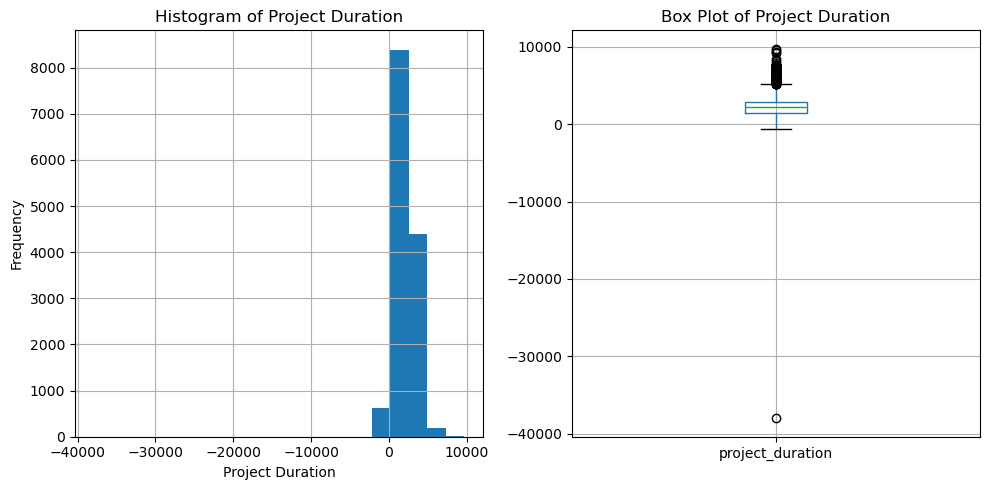

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Descriptive statistics
distribution_summary = df['project_duration'].describe()
print("Descriptive Statistics:")
print(distribution_summary)

# Value counts
value_counts = df['project_duration'].value_counts()
print("\nValue Counts:")
print(value_counts)

# Histogram
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['project_duration'].hist(bins=20)  # Adjust the number of bins as needed
plt.xlabel('Project Duration')
plt.ylabel('Frequency')
plt.title('Histogram of Project Duration')

# Box Plot
plt.subplot(1, 2, 2)
df.boxplot(column='project_duration')
plt.title('Box Plot of Project Duration')

plt.tight_layout()
plt.show()


In [73]:
import pandas as pd

# Assuming df is your DataFrame

# Drop rows where project_duration is less than 0
df = df[df['project_duration'] >= 0]

count    13572.000000
mean      2148.546640
std       1146.420247
min          0.000000
25%       1400.000000
50%       2167.000000
75%       2897.250000
max       9717.000000
Name: project_duration, dtype: float64


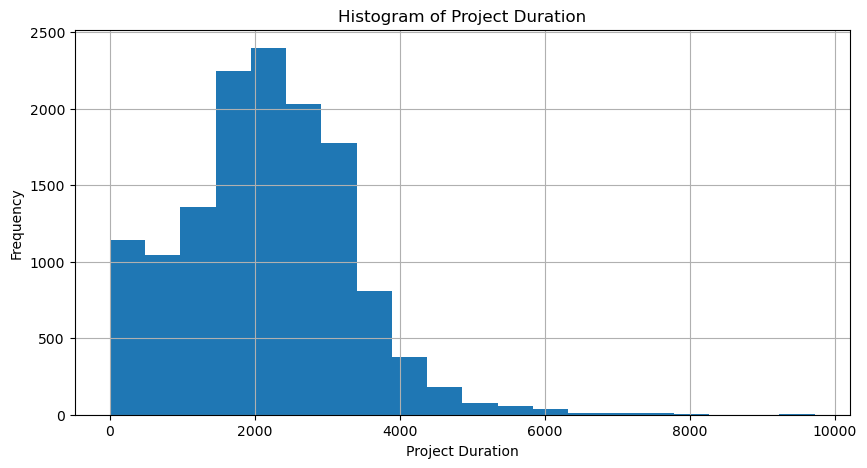

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Get descriptive statistics for the project_duration column
distribution_summary = df['project_duration'].describe()
print(distribution_summary)

# Plot a histogram of the project_duration column to visualize the distribution
plt.figure(figsize=(10, 5))
df['project_duration'].hist(bins=20)  # Start with 20 bins as an example
plt.xlabel('Project Duration')
plt.ylabel('Frequency')
plt.title('Histogram of Project Duration')
plt.show()


In [75]:
import pandas as pd

# Assuming df is your DataFrame

# Define the bin edges
bin_edges = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, float('inf')]

# Define the bin labels
bin_labels = [
    '0 - 500', '500 - 1000', '1000 - 1500', '1500 - 2000', 
    '2000 - 2500', '2500 - 3000', '3000 - 3500', 'Over 3500'
]

# Create the new column project_duration_bin with additional bins
df['project_duration_bin'] = pd.cut(df['project_duration'], bins=bin_edges, labels=bin_labels, right=False)

In [76]:
df.head()

,project_id,projectname,donor,donor_COW,country_code_WB,region,colonial_relations,sector_code,sector_description,office_presence,projectsize_original,project_size_USD_calculated,start_day,startyear,completion_day,completion_year,completion_year,eval_day,evalyear,eval_lag,project_duration,IQ.CPA.GNDR.XQ,IQ.CPA.SOCI.XQ,IQ.CPA.PUBS.XQ,IQ.CPA.PROT.XQ,IQ.CPA.TRAN.XQ,external_evaluator,gdp_pc,six_overall_rating,success,eval_lag_category,gdp_pc Category,project_duration_bin
0,61,Artisanal Fisheries Development Project,AfricanDB,CIV,AGO,Sub-Saharan Africa,No,310,"Agriculture, Forestry, Fishing",0,6488027,6488027,Monday,2003,Tuesday,2011,2011,Tuesday,2011,28,3144,NaN,NaN,NaN,NaN,NaN,internal,2022,4.060976,1,Within 30 days,1000 - 5000,3000 - 3500
1,65,Projet de reamenagement de la route Cotonou - ...,AfricanDB,CIV,BEN,Sub-Saharan Africa,No,210,Transport & Storage,0,15112584,15112584,Monday,1996,Thursday,2005,2005,Saturday,2006,457,3202,NaN,NaN,NaN,NaN,NaN,internal,817,4.333333,1,More than a year,0 - 1000,3000 - 3500
2,66,Promotion of Women’s Economic Activities in Ou...,AfricanDB,CIV,BEN,Sub-Saharan Africa,No,160,Other Social Infrastructure & Services,0,1372915,1372915,Friday,1997,Sunday,2006,2006,Monday,2009,960,3614,NaN,NaN,NaN,NaN,NaN,internal,839,3.392857,0,More than a year,0 - 1000,Over 3500
3,67,Projet d’electrification de 17 centres ruraux,AfricanDB,CIV,BEN,Sub-Saharan Africa,No,230,Energy,0,4886019,4886019,Wednesday,2000,Tuesday,2006,2006,Tuesday,2006,21,2288,NaN,NaN,NaN,NaN,NaN,internal,888,4.425000,1,Within 30 days,0 - 1000,2000 - 2500
4,68,Support project basic education (Education III),AfricanDB,CIV,BEN,Sub-Saharan Africa,No,160,Other Social Infrastructure & Services,0,8960464,8960464,Thursday,1998,Sunday,2006,2006,Sunday,2009,994,3251,NaN,NaN,NaN,NaN,NaN,internal,847,3.600000,0,More than a year,0 - 1000,3000 - 3500


In [77]:
# Round the six_overall_rating column to 2 decimal places
df['six_overall_rating'] = df['six_overall_rating'].round(2)

In [78]:
import pandas as pd

# Assuming df is your DataFrame

# Define the bin edges
bin_edges = [0, 1000000, 5000000, 10000000, 15000000, 25000000, 50000000, 100000000, float('inf')]

# Define the bin labels
bin_labels = ['0 - 1M', '1M - 5M', '5M - 10M', '10M - 15M', '15M - 25M', '25M - 50M', '50M - 100M', 'Over 100M']

# Create the new column project_size_bin
df['project_size_bin'] = pd.cut(df['project_size_USD_calculated'], bins=bin_edges, labels=bin_labels, right=False)

In [80]:
df['project_duration_bin'].value_counts()

project_duration_bin
2000 - 2500    2467
2500 - 3000    2354
1500 - 2000    2037
1000 - 1500    1724
Over 3500      1409
3000 - 3500    1370
0 - 500        1169
500 - 1000     1042
Name: count, dtype: int64

In [81]:
df.head()

,project_id,projectname,donor,donor_COW,country_code_WB,region,colonial_relations,sector_code,sector_description,office_presence,projectsize_original,project_size_USD_calculated,start_day,startyear,completion_day,completion_year,completion_year,eval_day,evalyear,eval_lag,project_duration,IQ.CPA.GNDR.XQ,IQ.CPA.SOCI.XQ,IQ.CPA.PUBS.XQ,IQ.CPA.PROT.XQ,IQ.CPA.TRAN.XQ,external_evaluator,gdp_pc,six_overall_rating,success,eval_lag_category,gdp_pc Category,project_duration_bin,project_size_bin
0,61,Artisanal Fisheries Development Project,AfricanDB,CIV,AGO,Sub-Saharan Africa,No,310,"Agriculture, Forestry, Fishing",0,6488027,6488027,Monday,2003,Tuesday,2011,2011,Tuesday,2011,28,3144,NaN,NaN,NaN,NaN,NaN,internal,2022,4.06,1,Within 30 days,1000 - 5000,3000 - 3500,5M - 10M
1,65,Projet de reamenagement de la route Cotonou - ...,AfricanDB,CIV,BEN,Sub-Saharan Africa,No,210,Transport & Storage,0,15112584,15112584,Monday,1996,Thursday,2005,2005,Saturday,2006,457,3202,NaN,NaN,NaN,NaN,NaN,internal,817,4.33,1,More than a year,0 - 1000,3000 - 3500,15M - 25M
2,66,Promotion of Women’s Economic Activities in Ou...,AfricanDB,CIV,BEN,Sub-Saharan Africa,No,160,Other Social Infrastructure & Services,0,1372915,1372915,Friday,1997,Sunday,2006,2006,Monday,2009,960,3614,NaN,NaN,NaN,NaN,NaN,internal,839,3.39,0,More than a year,0 - 1000,Over 3500,1M - 5M
3,67,Projet d’electrification de 17 centres ruraux,AfricanDB,CIV,BEN,Sub-Saharan Africa,No,230,Energy,0,4886019,4886019,Wednesday,2000,Tuesday,2006,2006,Tuesday,2006,21,2288,NaN,NaN,NaN,NaN,NaN,internal,888,4.43,1,Within 30 days,0 - 1000,2000 - 2500,1M - 5M
4,68,Support project basic education (Education III),AfricanDB,CIV,BEN,Sub-Saharan Africa,No,160,Other Social Infrastructure & Services,0,8960464,8960464,Thursday,1998,Sunday,2006,2006,Sunday,2009,994,3251,NaN,NaN,NaN,NaN,NaN,internal,847,3.60,0,More than a year,0 - 1000,3000 - 3500,5M - 10M


In [83]:
df.shape

(13572, 34)

In [84]:
dfT = df

In [85]:
df.to_csv('dfT.csv', index=False)

In [ ]:
BREAK

In [ ]:
df6 = df

In [ ]:
# Write DataFrame to CSV file
df6.to_csv('df6.csv', index=False)

In [ ]:
df6.head()

In [ ]:
df.drop(columns=['projectname', 'sector_description', 'start_day', 'completion_day', 'eval_day', 'projectsize_original', 'donor_COW', 'gdp_pc', 'IQ.CPA.GNDR.XQ', 'IQ.CPA.SOCI.XQ', 'IQ.CPA.PUBS.XQ', 'IQ.CPA.PROT.XQ', 'IQ.CPA.TRAN.XQ'], inplace=True)

In [ ]:
df5 = pd.read_csv('df5.csv')

In [ ]:
df5.isnull().sum()

In [ ]:
df5.head()

In [ ]:
df5.isnull().sum()

In [ ]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load your data
df5 = pd.read_csv('df5.csv')
df5 = pd.get_dummies(df5, drop_first=True)

# Prepare features and target variable
X = df5.drop('success', axis=1)
y = df5['success']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Save the model and feature columns
joblib.dump(model, 'model.joblib')
joblib.dump(X.columns, 'model_columns.joblib')

In [ ]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load your data
df5 = pd.read_csv('df5.csv')
df5.dropna(inplace=True)
df5 = pd.get_dummies(df5, drop_first=True)

# Prepare features and target variable
X = df5.drop('success', axis=1)
y = df5['success']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, 'model.joblib')

In [ ]:
# 2. Model Selection & Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 3. Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

df = df5

df.dropna(inplace=True)

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# 1. Data Preprocessing
X = df.drop('success', axis=1)  # Features
y = df['success']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Model Selection & Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 3. Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
import joblib

# Assuming model is your model object
joblib.dump(model, 'model.joblib')

In [ ]:
import sklearn
import joblib

print(sklearn.__version__)
print(joblib.__version__)


In [ ]:
STOP

In [ ]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load your data
df = pd.read_csv('df5.csv')
df.dropna(inplace=True)
df = pd.get_dummies(df, drop_first=True)

# Prepare features and target variable
X = df.drop('success', axis=1)
y = df['success']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, 'model.joblib')


# **Break**

In [ ]:
df.head()

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load your DataFrame
# Assuming df is your DataFrame containing the data
# Load your DataFrame here

# Drop one of the completion_year columns
df = df.drop('completion_year', axis=1)

# Define feature and target variables
X = df.drop('success', axis=1)
y = df['success']

# Define numerical and categorical features
numerical_features = ['project_size_USD_calculated', 'startyear', 'evalyear', 'eval_lag', 'project_duration']
categorical_features = ['donor', 'country_code_WB', 'region', 'colonial_relations', 'sector_code', 'office_presence', 'external_evaluator']

# Define preprocessing steps for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Create a pipeline that includes the preprocessor and the classifier
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)

# Train the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Retrieve and display feature importances
# Get the t


In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Define feature and target variables
X = df.drop('success', axis=1)
y = df['success']

# Create a pipeline that includes the preprocessor and the classifier
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)

# Train the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Retrieve and display feature importances
# Get the trained RandomForestClassifier from the pipeline
rf_model = clf.named_steps['classifier']

# Retrieve the feature importances from the RandomForestClassifier
feature_importances = rf_model.feature_importances_

# Retrieve the processed feature names
# This includes one-hot encoded feature names
num_features = numerical_features
cat_features = clf.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)
feature_names = num_features + list(cat_features)

# Combine feature names and importances into a DataFrame
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

pd.set_option('display.max_rows', None)

print("\nFeature Importances:")
print(importance_df)

In [ ]:
df.head()

In [ ]:
import pandas as pd

# Assuming df5 is your DataFrame
# Write DataFrame to CSV file
df5.to_csv('df5.csv', index=False)

# **BREAK**